Customer Happiness Level: 80.56


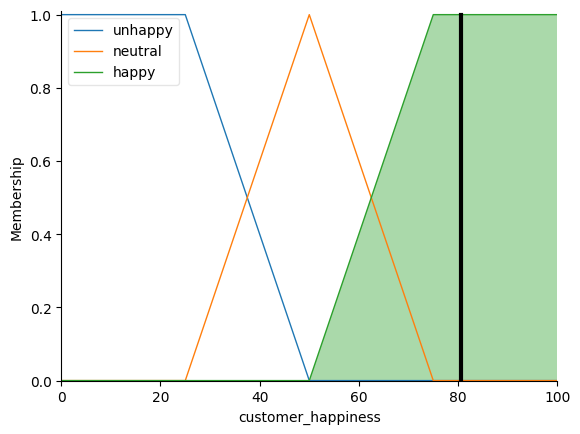

Grafik disimpan sebagai 'customer_happiness_graph.png'


<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
service_speed = ctrl.Antecedent(np.arange(0, 11, 1), 'service_speed')
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')
restaurant_ambience = ctrl.Antecedent(np.arange(0, 11, 1), 'restaurant_ambience')
customer_happiness = ctrl.Consequent(np.arange(0, 101, 1), 'customer_happiness')

# Membership functions for service_speed
service_speed['slow'] = fuzz.trapmf(service_speed.universe, [0, 0, 3, 5])
service_speed['average'] = fuzz.trimf(service_speed.universe, [3, 5, 7])
service_speed['fast'] = fuzz.trapmf(service_speed.universe, [5, 7, 10, 10])

# Membership functions for food_quality
food_quality['poor'] = fuzz.trapmf(food_quality.universe, [0, 0, 3, 5])
food_quality['average'] = fuzz.trimf(food_quality.universe, [3, 5, 7])
food_quality['excellent'] = fuzz.trapmf(food_quality.universe, [5, 7, 10, 10])

# Membership functions for restaurant_ambience
restaurant_ambience['bad'] = fuzz.trapmf(restaurant_ambience.universe, [0, 0, 3, 5])
restaurant_ambience['normal'] = fuzz.trimf(restaurant_ambience.universe, [3, 5, 7])
restaurant_ambience['good'] = fuzz.trapmf(restaurant_ambience.universe, [5, 7, 10, 10])

# Membership functions for customer_happiness
customer_happiness['unhappy'] = fuzz.trapmf(customer_happiness.universe, [0, 0, 25, 50])
customer_happiness['neutral'] = fuzz.trimf(customer_happiness.universe, [25, 50, 75])
customer_happiness['happy'] = fuzz.trapmf(customer_happiness.universe, [50, 75, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(service_speed['fast'] & food_quality['excellent'] & restaurant_ambience['good'], customer_happiness['happy'])
rule2 = ctrl.Rule(service_speed['average'] & food_quality['average'] & restaurant_ambience['normal'], customer_happiness['neutral'])
rule3 = ctrl.Rule(service_speed['slow'] | food_quality['poor'] | restaurant_ambience['bad'], customer_happiness['unhappy'])

# Create control system
happiness_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
happiness_sim = ctrl.ControlSystemSimulation(happiness_ctrl)

# Input values
happiness_sim.input['service_speed'] = 8  # Example input
happiness_sim.input['food_quality'] = 7  # Example input
happiness_sim.input['restaurant_ambience'] = 9  # Example input

# Perform fuzzy computation
happiness_sim.compute()

# Output result
print(f"Customer Happiness Level: {happiness_sim.output['customer_happiness']:.2f}")

# Visualize results
customer_happiness.view(sim=happiness_sim)

# Tambahkan plt.show() untuk menampilkan grafik interaktif
plt.show()

# Simpan grafik ke file jika diperlukan
plt.savefig('customer_happiness_graph.png')
print("Grafik disimpan sebagai 'customer_happiness_graph.png'")
